필요 패키지 불러오기

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

데이터 불러오기

In [ ]:
train_data=pd.read_csv('drive/MyDrive/data/train.csv')
test_data=pd.read_csv('drive/MyDrive/data/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



•	Survived : 0 = 사망, 1 = 생존   
•	Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석  
•	Sex : male = 남성, female = 여성  
•	Age : 나이  
•	SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수  
•	Parch : 타이타닉 호에 동승한 부모 / 자식의 수  
•	Ticket : 티켓 번호  
•	Fare : 승객 요금  
•	Cabin : 방 호수  
•	Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

성별로 분류하여 Initial을 확인  
crosstab은 범주형 데이터를 기준으로 개수 파악에 사용


In [ ]:
train_data['Initial']= train_data.Name.str.extract('([A-Za-z]+)\.')

test_data['Initial']= test_data.Name.str.extract('([A-Za-z]+)\.')

# A-Z 또는 a-z 사이에 있고 .(점)이 오는 문자열을 찾는다. 중간에 위치한 title 찾는 코드
# 성별로 분류하여 Initial을 확인

pd.crosstab(train_data.Initial,train_data.Sex).T.style.background_gradient(cmap='summer_r')


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


이니셜별로 평균을 사용하기위하여 유의미 하지 않은 이니셜은 유의미한 이니셜로 치환함

In [ ]:
# 라벨(title)을 유의미한 데이터로 대체한다.

train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                              ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
test_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                             ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [ ]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr


In [ ]:
# 라벨에 따라 나이의 평균 값을 나타낸다.

train_data.groupby('Initial')['Age'].mean()


Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

나이의 결측값을 이니셜의 평균 나이로 대체

In [ ]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age']=46

test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mr'),'Age'] = 33
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mrs'),'Age'] = 36
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Master'),'Age'] = 5
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Miss'),'Age'] = 22
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Other'),'Age'] = 46


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

embarked이 2개 결측값은 가장 많은 'S'로 대체 및 확인

In [ ]:
train_data['Embarked'].fillna('S',inplace=True)
train_data.Embarked.isnull().any()

False

나이는 연속형 데이터로 그냥 사용 해도 되나, 구간을 나누어 조금더 뚜렸한 패턴을 보이도록 해본다.

In [ ]:
# Age를 그룹화하기

train_data['Age_band']=0
train_data.loc[train_data['Age']<=16,'Age_band']=0
train_data.loc[(train_data['Age']>16)&(train_data['Age']<=32),'Age_band']=1
train_data.loc[(train_data['Age']>32)&(train_data['Age']<=48),'Age_band']=2
train_data.loc[(train_data['Age']>48)&(train_data['Age']<=64),'Age_band']=3
train_data.loc[train_data['Age']>64,'Age_band']=4


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


나이 구간별 건수 확인

In [ ]:
train_data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


신규로 추가된 파생변수로 분포를 확인해본다

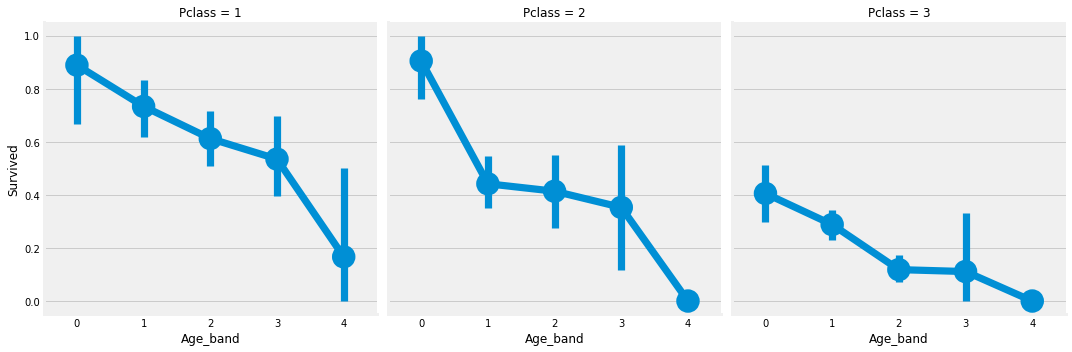

In [ ]:
sns.factorplot('Age_band','Survived',data=train_data,col='Pclass')
plt.show()


• SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
• Parch : 타이타닉 호에 동승한 부모 / 자식의 수  

Family_size = sibsp + parch  
Alone = Family_size가 0이면 1, 그렇지 않은 0으로 생성

In [ ]:
# train_data를 Family_Size와 Alone으로 분류

#family size
train_data['Family_Size']=0
train_data['Family_Size']=train_data['Parch']+train_data['SibSp']

In [ ]:
#Alone
train_data['Alone']=0
train_data.loc[train_data.Family_Size==0,'Alone']=1

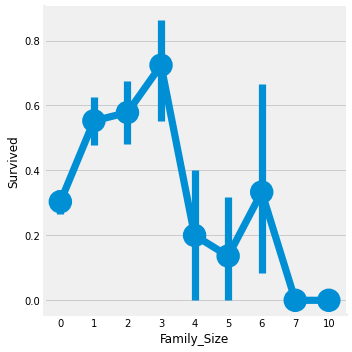

In [ ]:
sns.factorplot('Family_Size','Survived',data=train_data)
plt.show()

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


범주형 데이터의 수치형 데이터로 변환

In [ ]:
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)
train_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1


불필요 변수 제거

In [ ]:
train_data.drop(['Name','Age','Ticket','Cabin','PassengerId','SibSp','Parch'],axis=1,inplace=True)


In [ ]:
train_data.head()

,Survived,Pclass,Sex,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,0,3,0,7.2500,0,0,1,1,0
1,1,1,1,71.2833,1,1,2,1,0
2,1,3,1,7.9250,0,2,1,0,1
3,1,1,1,53.1000,0,1,2,1,0
4,0,3,0,8.0500,0,0,2,0,1


상관관계 확인

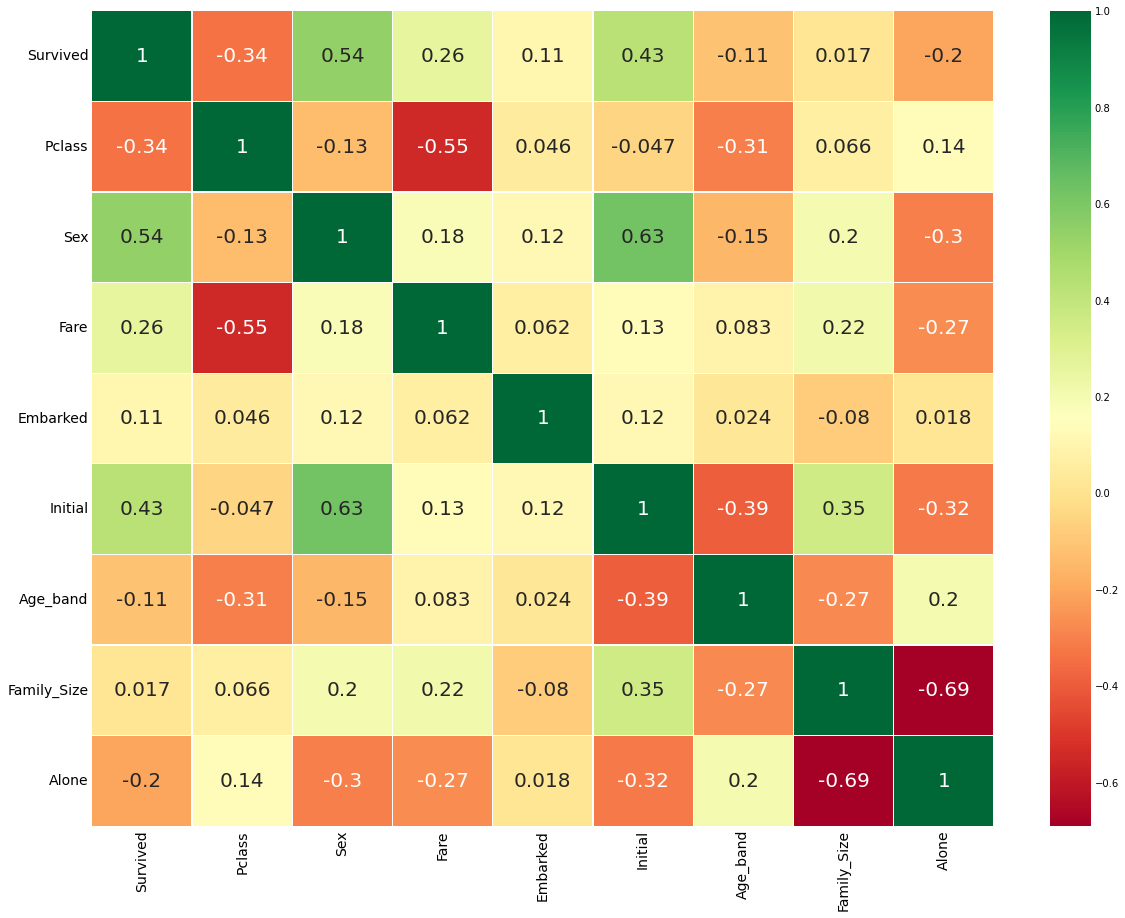

In [ ]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


다음 실습에 사용하기위한 저장

In [ ]:
train_data.to_csv('drive/MyDrive/data/p_train.csv', index=False)
test_data.to_csv('drive/MyDrive/data/p_test.csv', index=False)

In [ ]:
train_data.head()

,Survived,Pclass,Sex,Fare,Embarked,Initial,Age_band,Family_Size,Alone
0,0,3,0,7.2500,0,0,1,1,0
1,1,1,1,71.2833,1,1,2,1,0
2,1,3,1,7.9250,0,2,1,0,1
3,1,1,1,53.1000,0,1,2,1,0
4,0,3,0,8.0500,0,0,2,0,1


In [ ]:
train_data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Fare           0
Embarked       0
Initial        0
Age_band       0
Family_Size    0
Alone          0
dtype: int64